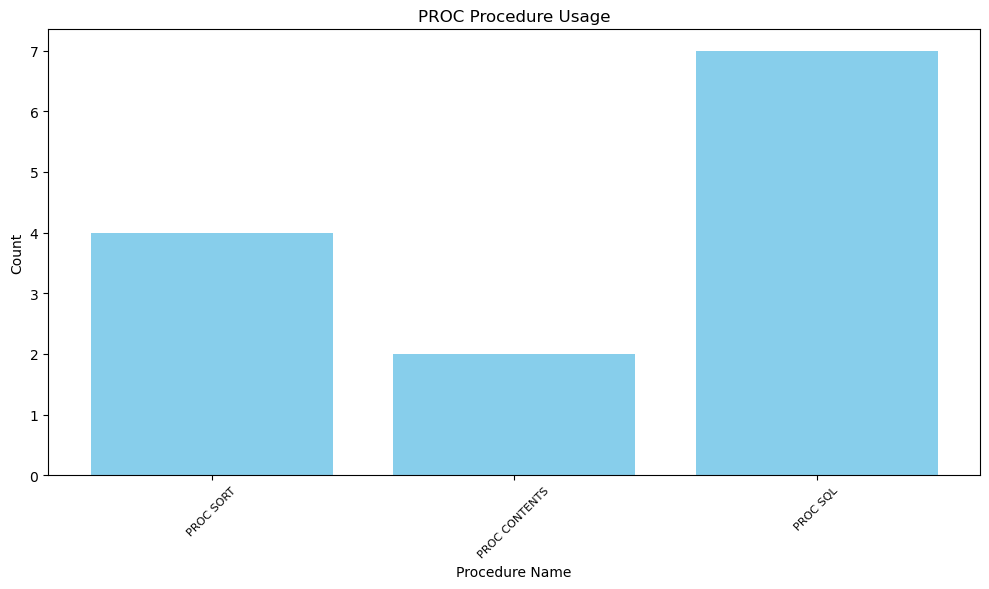

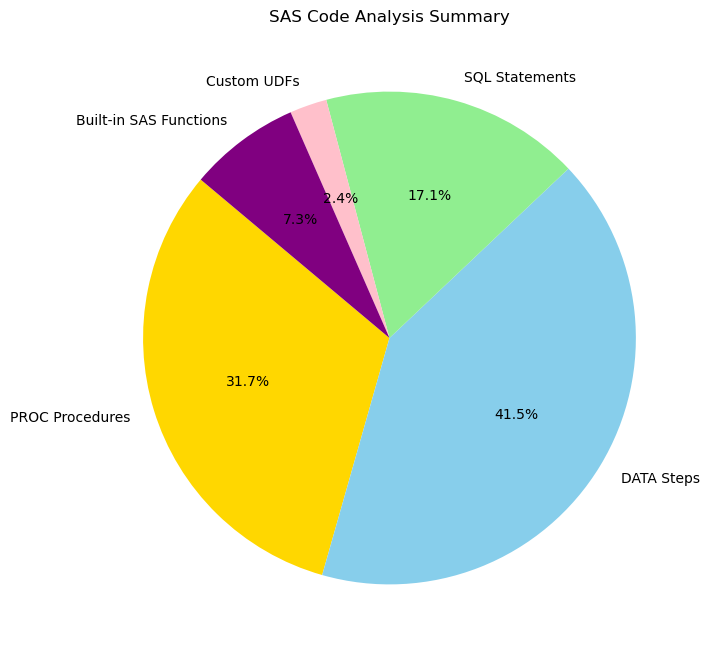


        Total PROC procedures: 13
        Total DATA steps: 17
        Total lines: 275
        Custom UDFs: 1
        Built-in SAS functions: 3
        SQL statements: 7 (including 0 nested)

        PROC Procedure Usage:
        PROC SORT: 4
PROC CONTENTS: 2
PROC SQL: 7

        DATA Step Usage:
        DATA: 17
        


In [3]:
import os
import re
from typing import List, Dict
import matplotlib.pyplot as plt
from collections import Counter


class SasAnalysis:
    def __init__(self):
        self.total_proc_procedures = 0
        self.total_data_steps = 0
        self.total_lines = 0
        self.custom_udfs = 0
        self.built_in_sas_functions = 0
        self.sql_statements = 0
        self.nested_sql_queries = 0
        self.proc_usage = Counter()
        self.data_step_usage = Counter()


class SasFile:
    def __init__(self, content: str, name: str):
        self.content = content
        self.name = name


class SasCodeScanner:
    def __init__(self):
        self.sas_files: List[SasFile] = []
        self.analysis = SasAnalysis()
        self.procs = ['PROC SQL', 'PROC SORT', 'PROC APPEND', 'PROC DATASETS', 'PROC DELETE',
                      'PROC EXPORT', 'PROC PRINT', 'PROC FORMAT', 'PROC REPORT', 'PROC TABULATE',
                      'PROC PRINTTO', 'PROC IMPORT', 'PROC CONTENTS', 'PROC COMPARE', 'LIBNAME',
                      'PROC FREQ', 'PROC TRANSPOSE', 'PROC MEANS', 'PROC SUMMARY', 'PROC RANK', 'PROC TABLUATE',
                      'PROC REG', 'PROC UNIVARIATE', 'INCLUDE']
        self.data_steps = ['DATA']

    def handle_file_change(self, files: List[str]):
        """Read SAS files from a local directory."""
        sas_files_array = []
        for file in files:
            with open(file, 'r') as f:
                content = f.read()
                sas_files_array.append(SasFile(content, os.path.basename(file)))
        self.sas_files = sas_files_array
        self.analyze_files()

    def analyze_files(self):
        """Analyze the loaded SAS files."""
        if self.sas_files:
            analysis_results = SasAnalysis()
            proc_pattern = re.compile(r'|'.join([rf'\b{proc.lower()}\b' for proc in self.procs]), re.IGNORECASE)
            data_step_pattern = re.compile(r'\bdata\b', re.IGNORECASE)

            for file in self.sas_files:
                content = file.content
                lines = content.split('\n')
                analysis_results.total_lines += len(lines)
                for line in lines:
                    stripped_line = line.strip().lower()

                    # Detect PROC procedures
                    proc_match = proc_pattern.search(stripped_line)
                    if proc_match:
                        analysis_results.total_proc_procedures += 1
                        proc_name = proc_match.group().upper()
                        analysis_results.proc_usage[proc_name] += 1

                    # Detect DATA steps
                    if data_step_pattern.search(stripped_line):
                        analysis_results.total_data_steps += 1
                        analysis_results.data_step_usage['DATA'] += 1

                    # Detect UDFs
                    if 'call symput' in stripped_line:
                        analysis_results.custom_udfs += 1

                    # Detect SQL statements
                    if 'proc sql' in stripped_line or stripped_line.startswith('sql'):
                        analysis_results.sql_statements += 1
                        if '(' in stripped_line and ')' in stripped_line:
                            analysis_results.nested_sql_queries += 1

                    # Detect built-in SAS functions
                    if 'create table' in stripped_line:
                        analysis_results.built_in_sas_functions += 1

            self.analysis = analysis_results

    def generate_graphs(self):
        """Generate graphical output using matplotlib."""
        # PROC procedure usage
        proc_names = list(self.analysis.proc_usage.keys())
        proc_counts = list(self.analysis.proc_usage.values())

        plt.figure(figsize=(10, 6))
        plt.bar(proc_names, proc_counts, color='skyblue')
        plt.title('PROC Procedure Usage')
        plt.xlabel('Procedure Name')
        plt.ylabel('Count')
        plt.xticks(rotation=45, fontsize=8)
        plt.tight_layout()
        plt.savefig('proc_usage_graph.png')
        plt.show()

        # Summary graph
        summary_labels = [
            'PROC Procedures',
            'DATA Steps',
            'SQL Statements',
            'Custom UDFs',
            'Built-in SAS Functions',
        ]
        summary_values = [
            self.analysis.total_proc_procedures,
            self.analysis.total_data_steps,
            self.analysis.sql_statements,
            self.analysis.custom_udfs,
            self.analysis.built_in_sas_functions,
        ]

        plt.figure(figsize=(8, 8))
        plt.pie(summary_values, labels=summary_labels, autopct='%1.1f%%', startangle=140,
                colors=['gold', 'skyblue', 'lightgreen', 'pink', 'purple'])
        plt.title('SAS Code Analysis Summary')
        plt.savefig('sas_analysis_summary.png')
        plt.show()

    def handle_export(self):
        """Export the analysis results to a text file."""
        proc_usage_text = '\n'.join([f"{proc}: {count}" for proc, count in self.analysis.proc_usage.items()])
        data_step_text = '\n'.join([f"{step}: {count}" for step, count in self.analysis.data_step_usage.items()])
        text = f"""
        Total PROC procedures: {self.analysis.total_proc_procedures}
        Total DATA steps: {self.analysis.total_data_steps}
        Total lines: {self.analysis.total_lines}
        Custom UDFs: {self.analysis.custom_udfs}
        Built-in SAS functions: {self.analysis.built_in_sas_functions}
        SQL statements: {self.analysis.sql_statements} (including {self.analysis.nested_sql_queries} nested)

        PROC Procedure Usage:
        {proc_usage_text}

        DATA Step Usage:
        {data_step_text}
        """
        print(text)
        with open('sas_analysis.txt', 'w') as f:
            f.write(text)


# Example usage
# scanner = SasCodeScanner()

# # Analyze local files (replace with actual SAS file paths)
# scanner.handle_file_change(['test2.sas'])

# # Generate graphs
# scanner.generate_graphs()

# # Export analysis
# scanner.handle_export()

